In [ ]:
!ls -lha kaggle.json
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!pwd


ls: cannot access 'kaggle.json': No such file or directory
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
/content


In [ ]:
!kaggle datasets download -d xhlulu/140k-real-and-fake-faces

Dataset URL: https://www.kaggle.com/datasets/xhlulu/140k-real-and-fake-faces
License(s): other
 99% 3.72G/3.75G [00:46<00:00, 109MB/s]
100% 3.75G/3.75G [00:46<00:00, 85.9MB/s]


In [ ]:
!unzip 140k-real-and-fake-faces.zip

Streaming output truncated to the last 5000 lines.
  inflating: real_vs_fake/real-vs-fake/valid/real/34832.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34836.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34839.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34847.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34848.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34852.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34861.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34864.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34868.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34877.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34883.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34887.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34891.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34894.jpg  
  inflating: real_vs_fake/real-vs-fake/valid/real/34904.jpg  
  inflating: real_v

In [ ]:
!kaggle datasets download -d sachchitkunichetty/rvf10k
!unzip rvf10k.zip

Streaming output truncated to the last 5000 lines.
  inflating: rvf10k/train/real/28081.jpg  
  inflating: rvf10k/train/real/28160.jpg  
  inflating: rvf10k/train/real/28181.jpg  
  inflating: rvf10k/train/real/28190.jpg  
  inflating: rvf10k/train/real/28192.jpg  
  inflating: rvf10k/train/real/28194.jpg  
  inflating: rvf10k/train/real/28197.jpg  
  inflating: rvf10k/train/real/28199.jpg  
  inflating: rvf10k/train/real/28247.jpg  
  inflating: rvf10k/train/real/28281.jpg  
  inflating: rvf10k/train/real/28308.jpg  
  inflating: rvf10k/train/real/28316.jpg  
  inflating: rvf10k/train/real/28332.jpg  
  inflating: rvf10k/train/real/28342.jpg  
  inflating: rvf10k/train/real/28345.jpg  
  inflating: rvf10k/train/real/28347.jpg  
  inflating: rvf10k/train/real/28392.jpg  
  inflating: rvf10k/train/real/28395.jpg  
  inflating: rvf10k/train/real/28401.jpg  
  inflating: rvf10k/train/real/28412.jpg  
  inflating: rvf10k/train/real/28461.jpg  
  inflating: rvf10k/train/real/28503.jpg  
  i

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.applications import DenseNet121, ResNet50
from tensorflow.keras.models import Model

In [ ]:
import os
import shutil

# Define paths
base_dir = '/content/rvf10k'  # Base directory containing train and valid directories
test_dir = os.path.join(base_dir, 'test')  # Destination directory

# Define subdirectories
subdirs = ['train', 'valid']
classes = ['fake', 'real']

# Function to create directory if it does not exist
def create_dir_if_not_exists(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

# Function to copy JPEG images
def copy_images(src_dir, dest_dir):
    for class_name in classes:
        src_class_dir = os.path.join(src_dir, class_name)
        dest_class_dir = os.path.join(dest_dir, class_name)

        create_dir_if_not_exists(dest_class_dir)

        for file_name in os.listdir(src_class_dir):
            if file_name.lower().endswith('.jpg'):  # Ensure the file is a JPEG image
                src_file_path = os.path.join(src_class_dir, file_name)
                dest_file_path = os.path.join(dest_class_dir, file_name)

                # Copy file
                shutil.copy(src_file_path, dest_file_path)

# Create test directory
create_dir_if_not_exists(test_dir)

# Copy images from train and valid directories to test directory
for subdir in subdirs:
    src_subdir = os.path.join(base_dir, subdir)
    dest_subdir = os.path.join(test_dir, subdir)

    create_dir_if_not_exists(dest_subdir)
    copy_images(src_subdir, dest_subdir)

print(f"JPEG images successfully copied to {test_dir}")


JPEG images successfully copied to /content/rvf10k/test


In [ ]:
import os
import shutil

# Define paths
base_dir = '/content/rvf10k'  # Base directory containing train and valid directories
final_dir = '/content/rvf10k/test'  # Final directory to hold combined images

# Define subdirectories
subdirs = ['train', 'valid']
classes = ['fake', 'real']
combined_dir = os.path.join(final_dir, 'test')

# Function to create directory if it does not exist
def create_dir_if_not_exists(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

# Ensure the final directory structure exists
create_dir_if_not_exists(combined_dir)

# Function to combine and move images
def combine_images(src_dirs, dest_dir):
    for class_name in classes:
        # Destination directory for the class
        dest_class_dir = os.path.join(dest_dir, class_name)
        create_dir_if_not_exists(dest_class_dir)

        for src_dir in src_dirs:
            src_class_dir = os.path.join(src_dir, class_name)
            if os.path.exists(src_class_dir):
                for file_name in os.listdir(src_class_dir):
                    if file_name.lower().endswith('.jpg'):
                        src_file_path = os.path.join(src_class_dir, file_name)
                        dest_file_path = os.path.join(dest_class_dir, file_name)

                        # Copy or move file
                        shutil.copy(src_file_path, dest_file_path)

# List of source directories
source_dirs = [os.path.join(base_dir, subdir) for subdir in subdirs]

# Combine images from train and valid directories
combine_images(source_dirs, combined_dir)

print(f"Images successfully combined into {combined_dir}")


Images successfully combined into /content/rvf10k/test/test


In [ ]:
train_dir = '/content/real_vs_fake/real-vs-fake/train'
val_dir = '/content/real_vs_fake/real-vs-fake/valid'
test_dir = '/content/rvf10k/test/test'

In [ ]:
print("Train_dir Subfolders: ", os.listdir(train_dir))
print("Valid_dir Subfolders: ", os.listdir(val_dir))
print("Test_dir Subfolders: ", os.listdir(test_dir))

Train_dir Subfolders:  ['real', 'fake']
Valid_dir Subfolders:  ['real', 'fake']
Test_dir Subfolders:  ['real', 'fake']


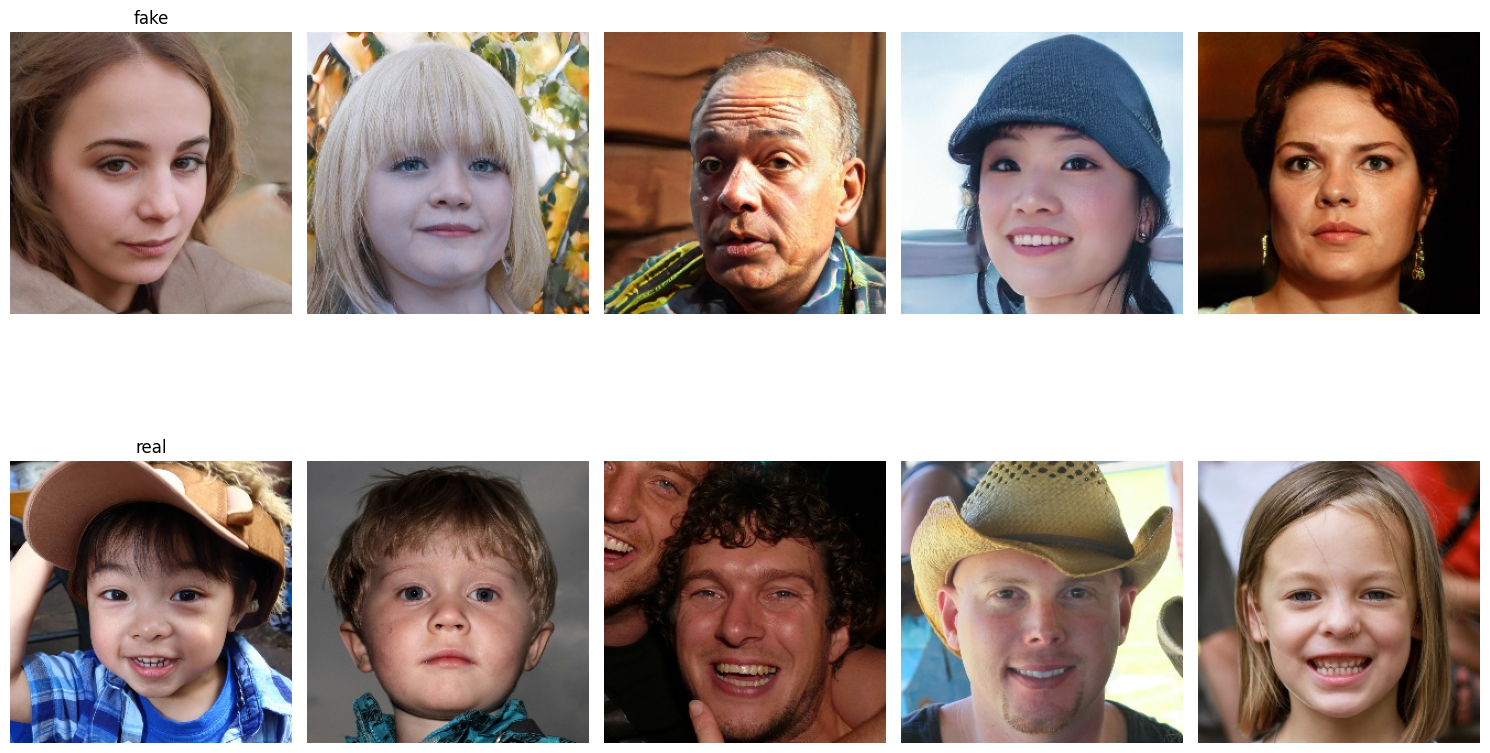

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define class names
class_names = ['fake', 'real']
num_images = 5

plt.figure(figsize=(15, 10))

# Plot sample images from training directory
for i, class_name in enumerate(class_names):
    class_dir = os.path.join(train_dir, class_name)
    images = os.listdir(class_dir)

    # Plot title for the class
    plt.subplot(len(class_names), num_images, i * num_images + 1)
    plt.title(class_name)
    plt.axis('off')

    # Plot sample images
    for j in range(num_images):
        img_path = os.path.join(class_dir, images[j])
        img = mpimg.imread(img_path)
        plt.subplot(len(class_names), num_images, i * num_images + j + 1)
        plt.imshow(img)
        plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_test_datagen = ImageDataGenerator(rescale=1./255)
target_size = (224,224)
batch_size = 32  


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)


test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  
)

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 10000 images belonging to 2 classes.


In [ ]:

print("Training class distribution:", train_generator.class_indices)
print("Validation class distribution:", val_generator.class_indices)

Training class distribution: {'fake': 0, 'real': 1}
Validation class distribution: {'fake': 0, 'real': 1}


In [ ]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(224, activation='relu'),
    
    Dense(2, activation='softmax')  
])


model.compile(optimizer='adam',
              loss='categorical_crossentropy',   
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      29,491,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,584,961 (112.86 MB)

 Trainable params: 29,584,961 (112.86 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10  
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3125/3125 ━━━━━━━━━━━━━━━━━━━━ 359s 111ms/step - accuracy: 0.7190 - loss: 0.5550 - val_accuracy: 0.8909 - val_loss: 0.2660
Epoch 2/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 341s 109ms/step - accuracy: 0.9282 - loss: 0.1829 - val_accuracy: 0.9219 - val_loss: 0.1967
Epoch 3/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 303s 97ms/step - accuracy: 0.9694 - loss: 0.0797 - val_accuracy: 0.9559 - val_loss: 0.1274
Epoch 4/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 314s 100ms/step - accuracy: 0.9851 - loss: 0.0408 - val_accuracy: 0.9520 - val_loss: 0.1446
Epoch 5/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 312s 99ms/step - accuracy: 0.9889 - loss: 0.0301 - val_accuracy: 0.9602 - val_loss: 0.1362
Epoch 6/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 315s 97ms/step - accuracy: 0.9926 - loss: 0.0204 - val_accuracy: 0.9585 - val_loss: 0.1585
Epoch 7/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 290s 93ms/step - accuracy: 0.9932 - loss: 0.0183 - val_accuracy: 0.9642 - val_loss: 0.1355
Epoch 8/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 324s 93ms/step - accuracy: 0.9946 -

In [ ]:
test_metrics = model.evaluate(test_generator)
print("Test metrics:", test_metrics[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 86ms/step - accuracy: 0.9958 - loss: 0.0092
Test metrics: 0.9955000281333923


In [ ]:
test_metrics = model.evaluate(train_generator)
print("Test metrics:", test_metrics[1])

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 232s 74ms/step - accuracy: 0.9962 - loss: 0.0103
Test metrics: 0.9964699745178223


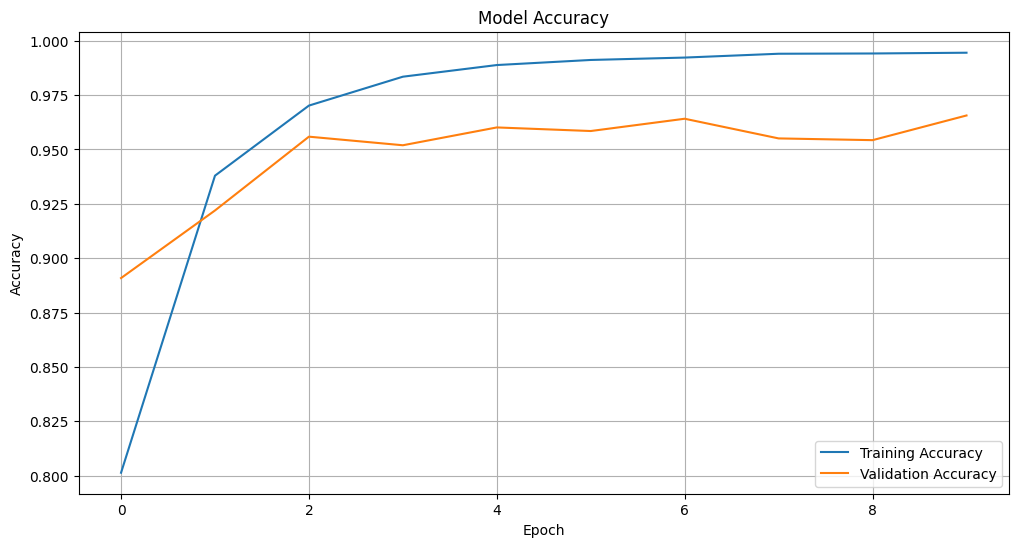

In [ ]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

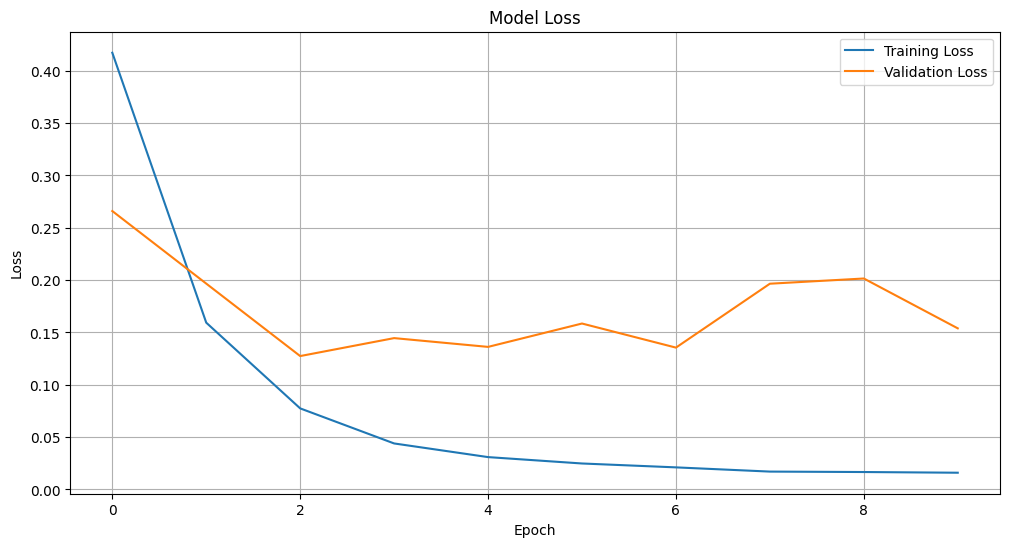

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [ ]:
# Generate predictions on the test set
test_generator.reset()
predictions = model.predict(test_generator, verbose=1)

# The model output is the probability of the image being real
# Convert probabilities to percentage
predicted_percentages = predictions * 100

# Convert to predicted classes with a threshold of 50%
predicted_classes = np.where(predicted_percentages > 50, 1, 0)

# Get true labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Print the classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 82ms/step
              precision    recall  f1-score   support

        fake       1.00      0.99      1.00      5000
        real       0.99      1.00      1.00      5000

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



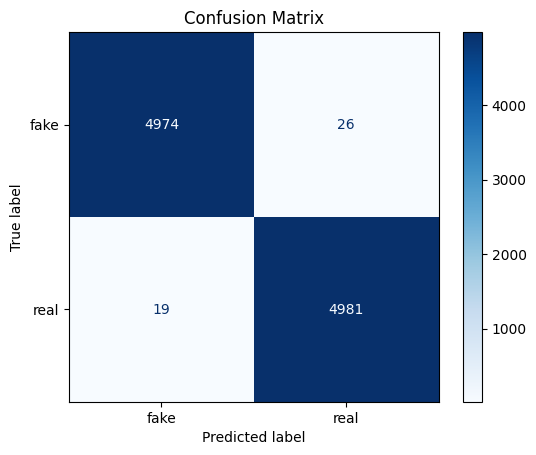

In [ ]:
# 3. Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# 4. Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()